In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Se

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [ ]:
train = gen.flow_from_directory("/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [ ]:
val = gen.flow_from_directory("/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


In [ ]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [ ]:
import seaborn as sns

<AxesSubplot:>

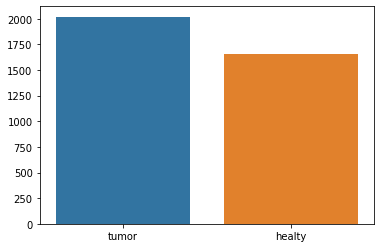

In [ ]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])


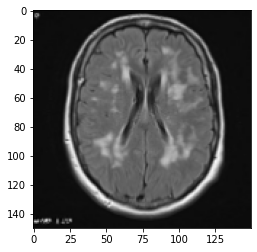

In [ ]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

In [ ]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

tensorflow.python.keras.layers.pooling.MaxPooling2D

In [ ]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               11214976  
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)              

In [ ]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min",
                                        patience=5, restore_best_weights = True)

In [ ]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
15/15 [==============================] - 35s 2s/step - loss: 0.6694 - accuracy: 0.6592 - val_loss: 0.6009 - val_accuracy: 0.7421
Epoch 2/20
15/15 [==============================] - 34s 2s/step - loss: 0.3897 - accuracy: 0.8149 - val_loss: 0.3458 - val_accuracy: 0.8487
Epoch 3/20
15/15 [==============================] - 34s 2s/step - loss: 0.2338 - accuracy: 0.9130 - val_loss: 0.3323 - val_accuracy: 0.9042
Epoch 4/20
15/15 [==============================] - 35s 2s/step - loss: 0.1310 - accuracy: 0.9603 - val_loss: 0.2489 - val_accuracy: 0.9554
Epoch 5/20
15/15 [==============================] - 34s 2s/step - loss: 0.0840 - accuracy: 0.9776 - val_loss: 0.2222 - val_accuracy: 0.9761
Epoch 6/20
15/15 [==============================] - 34s 2s/step - loss: 0.0539 - accuracy: 0.9848 - val_loss: 0.1802 - val_accuracy: 0.9902
Epoch 7/20
15/15 [==============================] - 33s 2s/step - loss: 0.0295 - accuracy: 0.9956 - val_loss: 0.1530 - val_accuracy: 0.9891
Epoch 8/20
15/15 [==

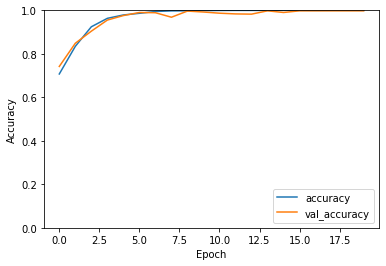

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

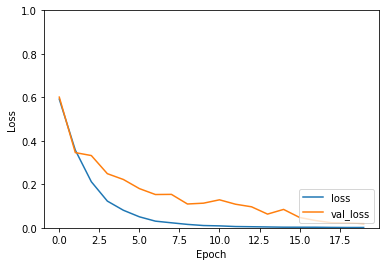

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

##***This model will detect if an individual is suffering from Brain Tumor or not. This detailed analysis of the dataset gives us the input and insight on the different medical parameters whic is helpful for the model to detect the brain tumor possibilities***